# Apprentissage Statistique avec Python.scikit-learn

#### Résumé

Après la préparation des données, cette vignette introduit l'utilisation de la librarie scikit_learnig pour la modélisation et l'apprentissage. Pourquoi utiliser scikit_learn? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvres: Exploration(ACP,AFCM,k-means), modélisation(régression logistique, k-plus proches voisins, arbres de décision, forêts aléatoires. Optimisation des paramètres(complexité) des modèles par validation croisée.

## 1. Introduction

### 1.1 Scikit_learn vs R

L'objectif de ce tutoriel est d'introduire la librairie scikit_learn de python dont les fonctionnalités sont pour l'essentiel un sous-ensemble de celles proposées pa les librairies de R. Se pose alors la question: quand utiliser scikit_learn de python plutot que par exemple "caret" de R plus complet et plus simple d'emploi?
Le choix repose sur les points suivants:
¤ Attention: Cette librairie manipule des objets de classe "array" de numpy chargés en mémoire et donc de taille limités par la RAM de l'ordinateur; de façon analogue R charge en RAM des objets de types "data.frame".
¤ Attention: Toujours, scikit_learn(0.16) ne reconnaît pas (ou pas encore?) la classe "data.frame de pendas; scikit_learn utilise la classe "array" de numpy. C'est un problème pour la gestion de variables qualitatives complexes. Une variable binaire est simplement remplacée par un codage(0,1) mais, en présence de plusieurs modalités, traiter celles-ci comme des entiers n'a pas de sens statistiques et remplacer une variable qualitative par l'ensemble des indicatrices (dummy variables(0,1) de ses modalités complique les stratégies de sélection de modèle et rend inexploitable l'interprétation statistique.
°Les implémentations en python de certains algorithmes dans scikit_learn sont aussi efficaces(i.e k-means), voire beaucoup plus efficaces(i.e forêts aléatoires), pour des données volumineuses.
°R offre beaucoup plus de possibilités pour une exploration, des recherches et comparaisons de modèles, des interprétations mais les capacités de parallélisation de python sont plus performantes. Plus précisements, l'introduction de nouvelles librairies n'est pas ou peu contraintes dans R comme en python alors que celle de nouvelles méthodes dans scikit_learn est sous contrôle d'un petit groupe qui vérifie la pertinence des méthodes, seules celles reconnues sont acceptées, et l'efficacité du code. 
En conséquences :
° Préférer R et ses librairies si la présentation(graphiques) des résultats et leur interpretation est prioritaire, si l'utilisation et / ou la comparaison de beaucoup de méthodes est recherchée.
° Préférer Python et scikit_learn pour mettre au point une chaîne de traitements(pipe line) opérationnelle de l'extraction à une analyse privilégiant la prévision brute à l'interpretation et pour des données quantitatives ou rendues quantitatives("vectorisation" de corpus de textes).
En revanche, si les données sont trop volumineuses pour la taille du disque et distribuées sur les noeuds d'un cluster sous Hadoop, consulter l'étape suivante pour l'utilisation de "MLlib" de Spark/Hadoop.

### 1.2 Fonctions de scikit_learn

La communauté qui développe cette libairie est très active, elle évolue rapidement. Voici une sélection de ses principales fonctionnalités.

° Transformations(standardisation, discrétisation binaire, regroupement de modalités, imputations rudimentaires de données manquantes), "vectorisation" de corpus de textes(encodage, catalogue, Tf-idf),images.

° Exploration : ACP, classification non supervisée(mélange gaussiens, propagation d'affinité, ascendante hiérarchique, SOM,...)

° Modéle linéaire général avec pénalisation(ridge, lasso, elastic net,...), analse discriminante lineaire et quadratique, k plus proches voisins, processus gaussiens, classificateur bayésien nïf, arbres de régression et classification(CART), agrégation de modèles (bagging, random forest, adaboost, gradient tree boosting), SVM(classification, régression, détection d'atypiques,...).


° Algorithmes de validation croisée (loo, k-fold, VC stratifiée,...) et sélection de modèles, optimisation sur une grille de paramètres, séparation aléatoire apprentissage et test, enchaînement(pipe line) de traitements, courbe ROC.

En résume, cette librairie est focalisée sur les aspects "machines" de l'apprentissage de données quantitatives(séries, signaux, images) volumineuses tandis que R intègre l'analyse de variables qualitatives complexes et l'interprétation statistique fine des résultats au détriments parfois de l'efficacité des calculs.

### 1.3 Objectif

L'objectif est d'illustrer la mise en oeuvre de quelques fonctionnalités de la librairie scikit_learn.

Deux jeux de données élémentaires sont utilisés. Celui précédent géré avec "pandas" et concernant le naufrage du 'Titanic' mélange des variables explicatives qualitatives et quantitatives dans un objet de la classe DataFrame. Pour être utilisé dans "scikit_learn" les données doivent être transformées en un objet de classe "array" de numpy en remplaçant les variables qualitatives par les indicatrices de leurs modalités. L'autre ensemble de données est entièrement quantitatif. C'est un problème classique de 'reconnaissance de caractères' qui est inclus dans la librairie scikit_learn, de même que les trop fameux iris de Fisher.

Ces données sont explorées par ACP(caractères) ou AMC(titanic), Classifiées puis modélisées par régression logistique(titanic), k_plus prochs voisins(caractères), arbres de discrimination, et forêts aléatoires. Les paramètres de complexité des
modèles sont optimisés par minimisation de l’erreur de prévision estimée par
validation croisée.

D’autres fonctionnalités sont laissées momentanément de côté ; cela
concerne les possibilités d’enchaînement (pipeline) de méthodes et d’automatisation.
Il s’agit, par exemple, de répéter automatiquement la séparation
aléatoire des échantillons apprentissage et test pour estimer les distributions
des erreurs, comme c’est relativement facile à mettre en oeuvre en R avec la
librairie caret. Ces fonctionnalités seront développées en Python avec les
scénarios à venir sur des données plus complexes et plus volumineuses.

## 2 Exploration multidimensionnelle

### 2.1 Les données 

#### Les données "Caractères"

Il s'agit d'explorer celles de reconnaissance de caractères dont les procédés d'obtention et prétraitements sont décrits sur le site de l'UCI. Les chiffres ont été saisies sur des tablettes à lintérieur de cadres de résolutions 500 * 500. Des procéddure de normalisation, ré-échantillonnage spatial puis de lissage ont été appliquées. Chaque caractère apparaît finalement discrétisé sous la forme d'une matrice 8 * 8  de pixels à 16 niveaux de gris et identifié par un label. Les donnéees sont archivées sous la forme d'une matrice ou tableau à trois indices . Elles sont également archivées après vectorisation des images sous la forme d'une matrice à p=64 colonnes.


In [1]:
# Importations 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Les données 
digits = datasets.load_digits()
#print(digits)

# Dimensions 
digits.images.shape

# Sous forme d'une cube d'images 1797*88
print("image=", digits.images)

# Sous forme d'une matrice 1797*64
print("data=", digits.data)

# Label réel de chaque caractère
print("target=", digits.target)

image= [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12

Voici un aperçu des images à discriminer:

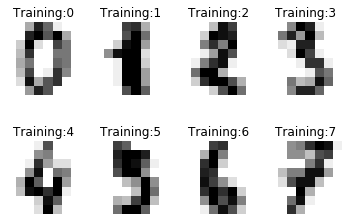

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training:%i' % label)

#### Titanic

In [3]:
#lire les données d'apprentissage
import pandas as pd

df=pd.read_csv("C:/Users/Sony/Desktop/Mes_Docs/DA_DS/titanic-train.csv",skiprows=1,
header=None,usecols=[1,2,4,5,9,11],
names=["Surv","Classe","Genre","Age",
"Prix","Port"],dtype={"Surv":object,
"Classe":object,"Genre":object,"Port":object})

print(df.head())

#dimensions
df.shape

#Redéfinir les types
df["Surv"] = pd.Categorical(df["Surv"], ordered=False)
df["Classe"] = pd.Categorical(df["Classe"], ordered=False)
df["Genre"] = pd.Categorical(df["Genre"], ordered = False)
df["Port"] = pd.Categorical(df["Port"], ordered = False)
df.dtypes

  Surv Classe   Genre   Age     Prix Port
0    0      3    male  22.0   7.2500    S
1    1      1  female  38.0  71.2833    C
2    1      3  female  26.0   7.9250    S
3    1      1  female  35.0  53.1000    S
4    0      3    male  35.0   8.0500    S


Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

Verifier que les données contiennent des valeurs manquantes, faire des imputations à la médiane d'une valeur quantitative manquante ou la modalité la plus fréquente d'une valeur qualitative absente.


In [4]:
df.count()
#imputation des valeurs manquantes
df["age"] = df["Age"].fillna(df["Age"].median())
df.Port = df["Port"].fillna("S")

#Discretiser les variables quantitatives
df["AgeQ"] = pd.qcut(df.Age, 3, labels=["Ag1","Ag2","Ag3"])
df["PrixQ"]=pd.qcut(df.Prix, 3, labels=["Pr1", "Pr2","Pr3"])

#redefinir les noms des modalites
#df["Surv"]=df["Surv"].Cat.rename_categories(["Vnon","Voui"])
#df["Classe"]=df["Classe"].Cat.rename_categories(["Cl1", "Cl2", "Cl3"])
#df["Genre"] = df["Genre"].Cat.rename_categories(["Gfem","Gmas"])
#df["Port"] = df["Port"].Cat.rename_categories(["Pc","Pq","Ps"])
print(df.head())

  Surv Classe   Genre   Age     Prix Port   age AgeQ PrixQ
0    0      3    male  22.0   7.2500    S  22.0  Ag1   Pr1
1    1      1  female  38.0  71.2833    C  38.0  Ag3   Pr3
2    1      3  female  26.0   7.9250    S  26.0  Ag2   Pr1
3    1      1  female  35.0  53.1000    S  35.0  Ag3   Pr3
4    0      3    male  35.0   8.0500    S  35.0  Ag3   Pr1


### 2.2 Analyse en composantes principales

La fonction d'analyse en composantes principales (ACP) est surtout adaptée à l'analyse de signaux, de nombreuses options ne sont pas disponibles notamment les graphiques usuels(biplot, cercles de corrélations...). En revanche des résultats sont liés à la version probabiliste de l'ACP sous hpothèse d'une distribution gaussienne multidimensionnelle des données. *ATTENTION*, l'ACP est évidemment centrée mais pas reduite. L'option n'est pas prévue et les variables doivent être réduites(fctions "sklearn.preprocessing.scale) avant si c'est nécessaire. L'attribut "transform" désigne les composantes principales, sous-entendu: transformation par réduction de la dimension; "n_components" fixe le nombre de composantes retenues, par défaut toutes; l'attribut "components_" contient les "n_components" vecteurs propres mais non normalisés, c'est à dire de norme carée la valeur propre associée et donc à utiliser pour représenter les variables.

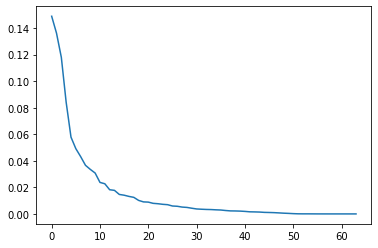

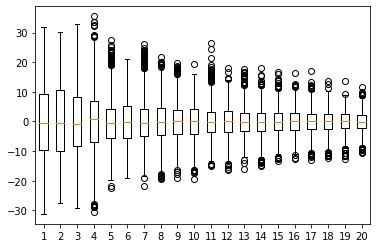

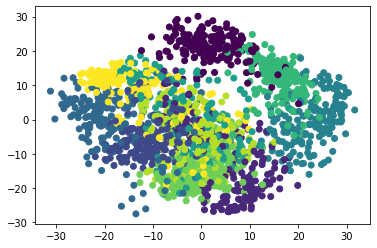

In [5]:
from sklearn.decomposition import PCA

X = digits.data
y = digits.target
target_name = [0,1,2,3,4,5,6,7,8,9]

#définition de la commande
pca = PCA()

#Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)

#Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

#Diagramme boîte des premières composantes principales
plt.boxplot(C[:,0:20])
plt.show()

#Représentation des caractères dans le premier plan principal.
plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
plt.show()


Le même graphique avec une légende mais moins de couleurs.

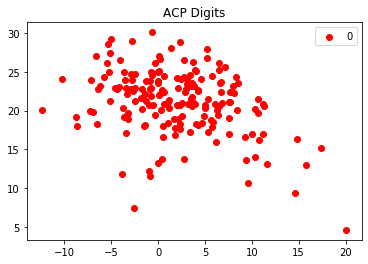

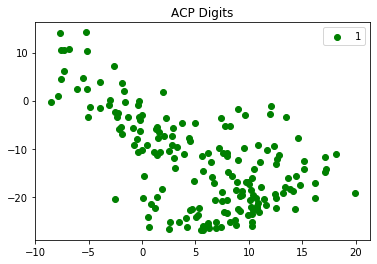

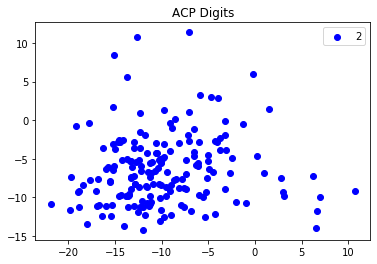

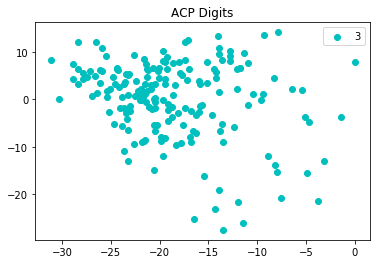

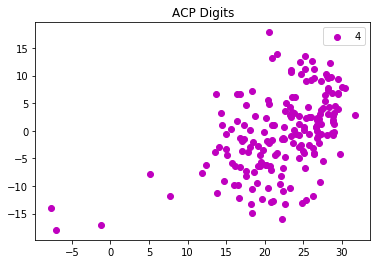

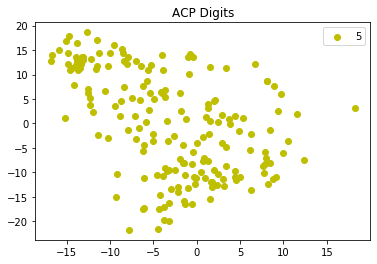

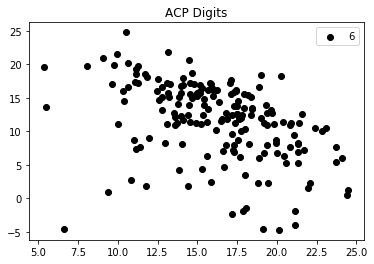

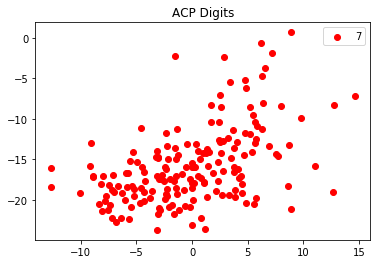

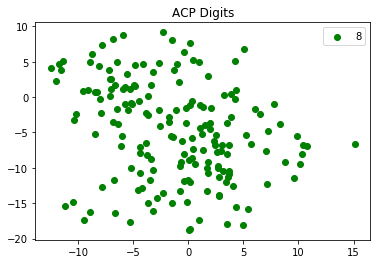

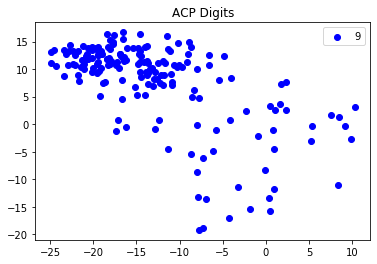

In [6]:
plt.figure()
for c, i, target_name in zip("rgbcmykrgb",[0,1,2,3,4,5,6,7,8,9], target_name):
    plt.scatter(C[y == i, 0], C[y == i, 1], c=c, label=target_name)
    plt.legend()
    plt.title("ACP Digits")
    plt.show()

Graphique en trois dimensions 

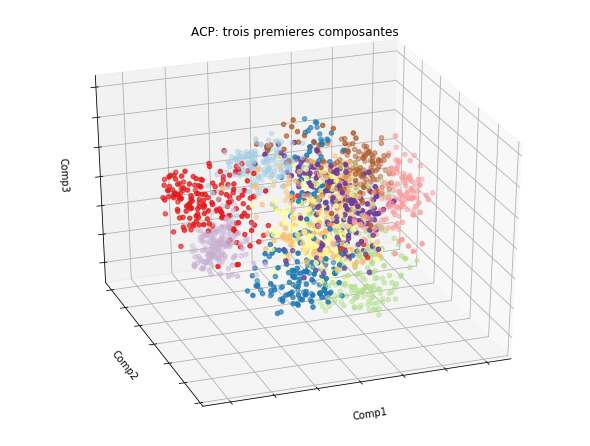

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(C[:,0], C[:,1], C[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_title("ACP: trois premieres composantes")
ax.set_xlabel("Comp1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Comp2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Comp3")
ax.w_zaxis.set_ticklabels([])
plt.show()

 ### 2.3 Classification  non supervisée

Exécution de l'algorithme de *classification non supervisée(clustering) k_means* dans un cas simple: Le nombre des classes:paramètres *n_clusters* (8 par défaut) est a priori connu. D'autres paramètes peuvent être précisés ou laissés à leur valeur par défaut. Le nombre *max_iter* d'itérations(300), le nombre *n_init* (10) d'exécutions parmi lesquelles la meilleur en terme de minimisation de la variance intra-classe est retenue, le mode *init* d'initialisation qui peut être *k_means++* (par défaut) pour en principe accélérer la convergence, *random* parmi les données, ou une matrice déterminant les centres initiaux.
L'option *n_jobs* permet d'exécuter les *n_init* en parallèle. Pour la valeur -2, tous les processeurs sauf un sont utilisés. Les attributs en sortie contiennent les centres: *cluster_centres_* , les numéros de classe de chaque observation: *labels_*

De nombreux critères à consulter dans la documentation sont proposés pour évaluer la qualité d'une classification non-supervisée.
On se contente des options par défauts dans cette illustrations

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

est = KMeans(n_clusters=10)
est.fit(X)
classe = est.labels_
print(classe)


[6 0 0 ... 0 2 2]


Les vraies classes étant connues, il est facle de construire une matrice de confusion.


Classe    1   2    3
Surv                
0        80  97  372
1       136  87  119


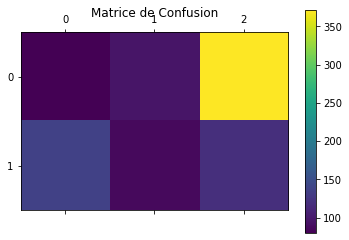

In [9]:
import pandas as pd

table = pd.crosstab(df["Surv"], df["Classe"])
print(table)
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

Il n'est pas plus difficile de représenter les classes dans les coordonnéees de l'ACP. C'est la variable *classe* qui définit les couleurs

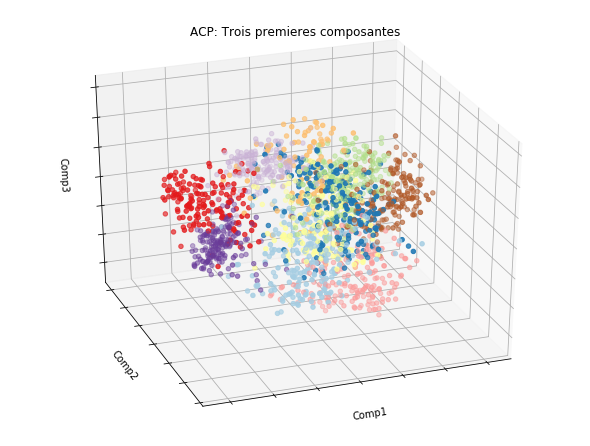

In [10]:
fig = plt.figure(1, figsize = (8,6))
ax = Axes3D(fig, elev =-150, azim = 110)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c = classe, cmap=plt.cm.Paired)
ax.set_title("ACP: Trois premieres composantes")
ax.set_xlabel("Comp1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Comp2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Comp3")
ax.w_zaxis.set_ticklabels([])
plt.show()

### 2.4 Analyse Multiple des Correspondances

Les données "Titanic" regroupent des variables qualitatives et quantitatives. Après recodage en classe(discrétisation) des variables quantitatives, la table obtenue se prête à une *Analyse Factorielle Multiple des Correspondances*. Cette  méthode n'est pas présente dans les librairies courantes de python mais disponibles sous la forme d'une fonction "*mca.py*". Il est possible d'insatller la librairie correspondante ou de simplement charger le seul module "*mca.py*" dans le répertoire courant. Remarque, il ne serait pas plus compliqué de recalculer directement les composantes de l'AFCM à partir de la SVD du tableau disjonctif complet.   

Ce tableau est obtenu en remplaçant chaque variables par les indicatrices, ou *dummy* variables, de ses modalités.

In [11]:
# Suppression des variables quantitatives pour l'AFCM
df_q = df.drop(["Age", "Prix"], axis = 1)
#df_q.head()

# Indicatrices
dc = pd.DataFrame(pd.get_dummies(df_q[["Surv", "Classe", "Genre",
                                     "Port", "AgeQ", "PrixQ"]]))
dc.head()

,Surv_0,Surv_1,Classe_1,Classe_2,Classe_3,Genre_female,Genre_male,Port_C,Port_Q,Port_S,AgeQ_Ag1,AgeQ_Ag2,AgeQ_Ag3,PrixQ_Pr1,PrixQ_Pr2,PrixQ_Pr3
0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0


Calcul de l'AFCM et représentations graphiques

In [87]:
conda config --set channel_priority false



Note: you may need to restart the kernel to use updated packages.


In [88]:
conda install mca

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - mca

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [89]:

import mca

mca_df = mca(dc, benzecri = False)

# Valeurs singulieres
print(mca_df.L)

#composantes Principales des colonnes (modalités)
print(mca_df.fs_c())

# Premier plan principale
col = [1,1,2,2,2,3,3,5,5,5,6,6,6,7,7,7]
plt.scatter(mca_df.fs_c()[:, 0], mca_df.fs_c()[:, 1], col = col)

for i, j, nom in zip(mca_df.fs_c()[:, 0], mca_df.fs_c()[:,1], dc.columns):
    plt.text(i,j,nom)
plt.show()
    

TypeError: 'module' object is not callable

Comme pour l'ACP et au contraire de R, les librairies pythons sont pauvres en fonction graphiques directements adaptées à l'AFCM. Le graphique est construit à partir des fonctions de *matplotlib*. Remarquer l'évidence redondance entre la variable Prix et celle Classe. Il serait opportun d'en déclarer une supplémentaire.



Il est alors facile de construire des classifications non supervisées des modalités des variables ou des passagers à partir de leurs composantes respectives quantitatives, ce qui revient à considérer des distances dites du "*chi2*" entre ces objets. Très utilisées en marketing(segmentation de clientèle), cette stratégie n'a pas grand intérêt sur ces données

## Modélisation et Apprentissage Statistiques

Voici des exemples de mise en oeuvres de quelques unes des méthodes de modélisations / apprentissage statistique les plus utilisées

### 3.1 Extraction des échantillons 

Le travaille préliminaire consiste à séparer les échantillons en une partie *apprentissage* et une autre de *test* pour estimer sans biais *l'erreur de prévisison*. L'optimisation (biais-variance) de la complexité des modèles est réalisée en minimisant l'erreur estimée par *validation croisée*

#### Carectères

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11)


#### Titanic

In [13]:
## Table de départ
df.head()

#table des indicatrices
df1 = pd.get_dummies(df_q[["Surv", "Classe","Genre", "Port", "AgeQ","PrixQ"]])

## Une seul indicatrice par variable binaire
df1 = df1.drop(["Surv_0", "Genre_male"], axis = 1)

##Variable quantitatives
df2 = df[["Age", "Prix"]]

# Concaténation
df_c = pd.concat([df1, df2], axis = 1)

#Vérification
df_c.columns

#df1

Index(['Surv_1', 'Classe_1', 'Classe_2', 'Classe_3', 'Genre_female', 'Port_C',
       'Port_Q', 'Port_S', 'AgeQ_Ag1', 'AgeQ_Ag2', 'AgeQ_Ag3', 'PrixQ_Pr1',
       'PrixQ_Pr2', 'PrixQ_Pr3', 'Age', 'Prix'],
      dtype='object')

Extraction des échantillons apprnetissage et test.

In [14]:
# Variables explicatives
T = df_c.drop(["Surv_1"], axis=1)

#Variable à modéliser
z = df_c["Surv_1"]

# Extractions
T_train, T_test, z_train, z_test = train_test_split(T,z, test_size=0.2, random_state=11)
              

In [93]:
z_train

333    0
662    0
382    0
331    0
149    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: Surv_1, Length: 712, dtype: uint8

*ATTENTION:* l'échantillon test des données"*Titatnic*" est relativement petit, l'estimation de l'erreur de prévision est donc sujette à caution car probablement de grande variance. Il suffit de changer l'initialisation(paramètre *random_state*) et ré-exécuter les scripts pour s'en assurer.

### 3.2 *K* plus proches voisins

Les images des caractères sont codées par des variables quantitatives. Le problème de reconnaissance de forme ou de discrimination est adapté à l'algorithme des *k*-plus proches voisins. Le paramètre à optimiser pour contrôler la complexité du modéle est le nombre de voisin *n_neighbors*. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
digit_knn = knn.fit(X_train, y_train)

# ESTIMATION de l'erreur de prévision sur l'echantillon test
1-digit_knn.score(X_test, y_test)

0.02444444444444449

Optimisation du paramètre de complexité du modèle par validation croisée en chérchant l'erreur minimale sur une grille de valeurs du paramètre avec *cv=5-fold cross validation* et *n_jobs=1* pour une exécution en parallèle utilisant tous les processeurs sauf 1. attention, comme la validation croisée est aléatoire, deux exécutions successives ne donnent pass nécessairement le même résultats

In [16]:
from sklearn.model_selection import learning_curve, GridSearchCV

# grille de valeurs
param = [{"n_neighbors":list(range(1,15))}]
knn = GridSearchCV(KNeighborsClassifier(), param, cv = 5, n_jobs = -1)
digit_knn = knn.fit(X_train, y_train)

# paramètre optimal
digit_knn.best_params_["n_neighbors"]

4

Le modèle est estimé avec la valeur "optimale" du paramètre

In [17]:
param = [{"n_neighbors":list(range(1,15))}]
knn = KNeighborsClassifier(n_neighbors=
digit_knn.best_params_["n_neighbors"])
digit_knn = knn.fit(X_train, y_train)

# Estimation de l'erreur de prévisions 
1-digit_knn.score(X_test, y_test)



0.01777777777777778

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      45   0   0   0   0   0   0   0   0   0
1       0  45   0   0   0   0   0   0   0   0
2       0   0  54   0   0   0   0   0   0   0
3       0   0   0  42   0   1   0   1   0   0
4       0   1   0   0  49   0   0   0   0   0
5       0   0   0   0   0  38   0   0   0   0
6       0   0   0   0   0   0  42   0   0   0
7       0   0   0   0   0   0   0  45   0   0
8       0   1   0   1   0   0   1   0  41   0
9       0   0   0   0   1   0   0   0   1  41


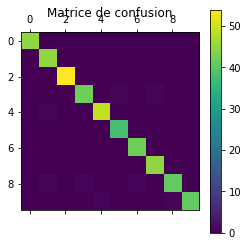

0.01777777777777778

In [97]:
# Prévision
y_chap = digit_knn.predict(X_test)

# matrice de confusion
table = pd.crosstab(y_test, y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de confusion")
plt.colorbar()
plt.show()
1-digit_knn.score(X_test, y_test)

### 3.3 Régression logistique


La prévision de la survie, variable binaire des données "Titanic", se prêtent à une *régression logistique*. Les versions pénalisées( Ridge, Lasso, elactic net, lars) du modèle linéaire général sont les algorithmes les plus développés dans *scikit-learn* au détriment de ceux plus classique de sélection de variables. Une version Lasso de la régression logistique est testée afin d'introduire la sélection automatique des variables.

Estimation et erreur de prévision du modèle complet sur l'échantillon test

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Variables explicatives
T = df_c.drop(["Surv_1"], axis=1)

#Variable à modéliser
z = df_c["Surv_1"]

# Extractions
T_train, T_test, z_train, z_test = train_test_split(T,z, test_size=0.2, random_state=11)

#np.where(np.isnan(z_train))
T_trainn = T_train.fillna(0)
T_testt = T_test.fillna(0)

logit = LogisticRegression()
titan_logit = logit.fit(T_trainn, z_train)

# Erreur
titan_logit.score(T_testt, z_test)



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8491620111731844

In [19]:

#Coefficients
titan_logit.coef_

array([[ 8.30643928e-01,  3.98186655e-02, -1.20755216e+00,
         2.31784568e+00,  9.95658089e-03,  1.54160881e-03,
        -3.48587758e-01,  5.72917181e-01,  6.83806371e-01,
         6.91108870e-01, -9.98331621e-02, -6.60686800e-02,
        -1.71187727e-01, -2.47020144e-02,  7.31696656e-04]])

In [20]:
import numpy as np
#T_trainn = T_train.fillna(0)
#np.where(np.isnan(T_test))
np.where(np.isnan(z_test))
#np.isnan(z_test)
#len(T_trainn)
#len(z_train)

(array([], dtype=int64),)

Comme pour le modèle linéaire, il faudrait construire les commandes d'aide à l'interprétation des résultats.

Pénalisation et optimisation du paamètre par validation croisée. Il existe une fonction spécifique mais son mode d'emploi est peu documenté; celle *GridSearchCV*, qui vient d'être utilisée, lui est préférée.

In [21]:
# grille de valeurs
param = [{"C":[0.01,0.05,0.1,0.15,1,10]}]
logit = GridSearchCV(LogisticRegression(penalty= "l2"),param,cv=5,n_jobs=-1)
titan_logit = logit.fit(T_trainn,z_train)

# paramètre optimal
titan_logit.best_params_["C"]

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.15

Estimation du modèle "optimal"

In [22]:
logit = LogisticRegression(C=0.98, penalty="l2")
titan_logit=logit.fit(T_trainn,z_train)

# Erreur
print(titan_logit.score(T_testt,z_test))

# Coefficients
print(titan_logit.coef_)

0.8324022346368715
[[ 9.33260382e-01 -1.13168494e-02 -1.25172324e+00  2.32779681e+00
   4.94010058e-02 -2.82087192e-02 -3.50971993e-01  5.50060954e-01
   5.84967283e-01  6.09175226e-01 -8.46851451e-02 -4.82486666e-02
  -1.96845895e-01 -2.36080144e-02  2.28469235e-04]]


C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3.4 Arbre de décision

##### Implémentation

Les *arbres binaires de décision* (CART: *classification and regression trees*) s'appliquent à tous tpes de variables. La complexité du modèle est gérée par deux paramètres: *max_depth*, qui détermine le nombre max de feuilles dans l'arbre, et le nombre minimales *min_samples_split* d'observations requises pour rechercher une dichotomie.

*ATTENTION*: Même s'il s'agit d'une implémentation proche de celle originale proposée par Breiman et il n'existe pas comme dans R (package *rpart*) un paramètre de pénalisation de la déviance du modèle pa sa complexité(nombre de feuilles) afin de construire une séquence d'arbres emboîtés dans la perspective d'un élagage (*pruning) optimal par validation croisée. La fonction générique de *k-fold cross* varlidation *GridSearchCV* est utilisée pour omptimisée le paramètre de profondeur mais avec beaucoup de précision dans l'élagage. Car ce dernier élimine tout un niveau et pas les seules feuilles inutiles à la qualité de la prévision.

En revanche, l'implémentation anticipe sur celle des méthodes d'agrégation de modèles en intégrant les paramètres (nombre de variables tirées, importance...) qui leurs sont spécifiques. D'autre part, la représentation graphique d'un arbre n'est pas incluse et nécessite l'implémentation d'un autre logiciel libre: *Graphviz*

Tout ceci souligne encore les objectifs de développement de cette librairie : temps de calcul et prévision brute au détriment d'une recherche d'interprétation. Dans certains exemples éventuellement pas trop compliqués, un arbre élagué de façon optimal peut en effet prévoir à peine moins bien (différence non significative) qu'une agrégation de modèles(forêt aléatoire ou *boosting*) et apporter un éclairage nettement plus pertinent qu'un algorithme de type "boite noire"

#### titanic

Estimation de l'arbre complet

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
digit_tree = tree.fit(T_trainn, z_train)

# Estimation de l'erreur de prévision
1-digit_tree.score(T_testt, z_test)

0.2011173184357542

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du parammètre avec *cv=5-fold cross validation* et *n_jobs=1* pour une exécution en parallèle utilisant tous les processeurs sauf 1. Attention, comme la validation croiseé est aléatoire et un arbre est un modèle instable, deux exécutions successives ne donnent pas nécessairement le même résultats.

In [24]:
from sklearn.model_selection import GridSearchCV
param = [{"max_depth":list(range(2,10))}]
titan_tree = GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
titan_opt = titan_tree.fit(T_trainn,z_train)

# paramètre optimal
titan_opt.best_params_

{'max_depth': 3}

La valeur "optimal" du paramètre est encore trop importante. Une valeur plus faible est utilisée.

In [25]:
tree = DecisionTreeClassifier(max_depth = 3)
titan_tree = tree.fit(T_trainn, z_train)

# Estimation de l'erreur de prévision
#1-titan_tree.score(T_testt, z_test)

# Estimation de l'erreur de prévision sur l'echantillon test
1-titan_tree.score(T_testt, z_test)

0.13407821229050276

Noter l'amélioration de l'erreur.

In [26]:
# Prévision de l'echantillon test
z_chap = titan_tree.predict(T_testt)

# Matrice de confusion
table = pd.crosstab(z_test, z_chap)
table

col_0,0,1
Surv_1,,
0,110,8
1,16,45


Tracer l'arbre avec le logiciel Graphviz

In [38]:
conda install pydotplus


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sony\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_3




pydotplus-2.0.2      | 23 KB     |            |   0% 
pydotplus-2.0.2      | 23 KB     | ######8    |  68% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updat

In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
import pydotplus

dot_data = StringIO()
export_graphviz(titan_tree, out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titan_tree.png")
#graph.write_pdf("titan_tree.pdf")

True

L'arbre est généré dans un fichier image à visualiser pour se rendre compte qu'il est plutôt mal élagué et pas directement interprétable sans les noms en clair des variables et modalités.

#### Caractères

La même démarche est utilisée pour ces données.

In [44]:
# Arbre complet
tree = DecisionTreeClassifier()
digit_tree = tree.fit(X_train,y_train)

# Estimation de l'erreur de prévision
1-digit_tree.score(X_test, y_test)

0.1711111111111111

Optimisation de la profondeur par validation croisée

In [46]:
from sklearn.model_selection import GridSearchCV

param = [{"max_depth":list(range(5,15))}]
digit_tree = GridSearchCV(DecisionTreeClassifier(),param,cv=5, n_jobs=-1)
digit_opt = digit_tree.fit(X_train,y_train)
digit_opt.best_params_

{'max_depth': 11}

Estimation de l'arbre "optimal"

In [47]:
tree = DecisionTreeClassifier(max_depth=11)
digit_tree = tree.fit(X_train, y_train)

# Estimation de l'erreur de prévision
1-digit_tree.score(X_test,y_test)

0.13111111111111107

Prévision de l'échantillon test et matrice de confusion

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      41   0   0   0   1   1   0   1   1   0
1       0  42   0   0   0   0   0   0   1   2
2       1   2  47   1   0   0   0   1   1   1
3       0   2   1  35   0   2   0   0   1   3
4       0   3   0   0  42   3   0   1   0   1
5       0   0   0   0   0  36   0   0   1   1
6       0   0   0   0   3   0  39   0   0   0
7       0   1   0   1   1   1   1  37   1   2
8       0   2   1   1   1   2   0   0  36   1
9       0   0   1   3   1   0   0   1   1  36


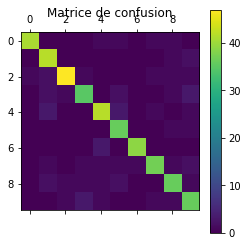

In [49]:
y_chap = digit_tree.predict(X_test)

# Matrice de confusion
table = pd.crosstab(y_test,y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de confusion")
plt.colorbar()
plt.show()

Cet arbre est trop complexe, il est inutile de le tracer, le résultats est illisible

### 3.5 Forêts aléatoires

L'algorithme d'agrégation de modèles le plus utilisé est celui des *forêts aléatoires* (random forest) de Breiman ce qui ne signifie pas qu'il conduit toujours à la meilleur prévision. Plus que le nombres d'arbres *n_estimators*, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d'un noeud: *max_features*. Par défaut, ilprend la valeur *p/3* en régression et *sqrt(p)* en discrimination.

#### Caractères

In [50]:
from sklearn.ensemble import RandomForestClassifier

# définition des paramètres
forest  = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                                max_leaf_nodes=None, bootstrap=True, oob_score=True)

# apprentissage
forest = forest.fit(X_train, y_train)
print(1-forest.oob_score_)

# erreur de prévision sur le test
1-forest.score(X_test, y_test)

0.022271714922049046


0.03111111111111109

L'optimisation du paramètre *max_features* peut être réalisée en minimisant l'erreur de prévision *out-of-bag*. Ce n'est pas prévu, il est aussi possible comme précédemment de minimiser l'erreur par validation croisée.

In [52]:
from sklearn.model_selection import GridSearchCV
param = [{"max_features":list(range(4,64,4))}]
digit_rf = GridSearchCV(RandomForestClassifier(n_estimators = 100),
                       param, cv=5, n_jobs = -1)
digit_rf = digit_rf.fit(X_train, y_train)

# Paramètre optimal
digit_rf.best_params_

{'max_features': 4}

Utilisation de la valeur "optimal". Notez que la méthode n'est pas trop sensible à la valeur de ce paramètre

0.02375649591685225
0.022222222222222254
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      44   0   0   0   1   0   0   0   0   0
1       0  45   0   0   0   0   0   0   0   0
2       0   0  54   0   0   0   0   0   0   0
3       0   1   0  41   0   1   0   1   0   0
4       0   0   0   0  49   0   0   1   0   0
5       0   0   0   0   0  38   0   0   0   0
6       0   0   0   0   0   1  41   0   0   0
7       0   0   0   0   0   0   0  44   0   1
8       0   2   0   0   0   0   0   0  42   0
9       0   0   0   0   0   0   0   1   0  42


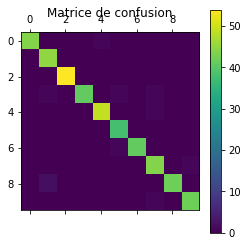

In [53]:
forest = RandomForestClassifier(n_estimators=500, criterion='gini', 
                                max_depth=None, min_samples_split=2,min_samples_leaf=1,
                                max_features=8,max_leaf_nodes=None, bootstrap=True, oob_score=True)

# apprentissage
forest = forest.fit(X_train, y_train)
print(1-forest.oob_score_)

# erreur de prévision sur le test
print(1-forest.score(X_test,y_test))

# prévision 
y_chap = forest.predict(X_test)

# Matrice de confusion
table = pd.crosstab(y_test, y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de confusion")
plt.colorbar()
plt.show()

#### Titanic

Même démarche

In [55]:
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, criterion='gini',
                               max_depth=None, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True)

# Apprentissage
forest = forest.fit(T_trainn, z_train)
print(1-forest.oob_score_)

# erreur de prévision sur le test
1-forest.score(T_testt, z_test)

0.2219101123595506


0.15083798882681565

Optimisation du paramètre *max_features* par validation croisée

In [56]:
from sklearn.model_selection import GridSearchCV

param = [{"max_features":list(range(2,15))}]
titan_rf = GridSearchCV(RandomForestClassifier(n_estimators=100), param, cv=5,n_jobs=-1)
titan_rf = titan_rf.fit(T_trainn,z_train)

# paramètre optimal
titan_rf.best_params_

{'max_features': 12}

Utilisation de la valeur "optimale"

In [59]:
forest = RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1, max_features=6,
                               max_leaf_nodes=None,bootstrap=True, oob_score=True)

# Apprentissage
forest = forest.fit(T_trainn, z_train)
print(1-forest.oob_score_)

# Erreur de prévision sur le test
print(1-forest.score(T_testt, z_test))

# prévision
z_chap = forest.predict(T_testt)

# Matrice de confusion
table = pd.crosstab(z_test, z_chap)
print(table)

0.2191011235955056
0.15083798882681565
col_0     0   1
Surv_1         
0       106  12
1        15  46


Modifier la valeur du paramètre pour constater sa faible influence sur la qualité plutôt médiocre du résultats

*ATTENTION*, comme déjà signalé, l'échantillon test est de relativement faible taille (autour de 180), il serait opportun d'itérer l'extraction aléatoire de l'échantillon tests pour tenter de réduire la variance de cette estimation et avoir une idée de sa distributi